### Welcome to this Life Expectancy Data Analysis Project.

#### The project aim at finding the various factors that iinfluence the overall life expectancy individuals across different countries.

#### This project intend to provide reasonable insights into the following questions at the end of this analysis.
1. What is the trend of life expectancy over the years?
2. How does life expectancy vary across different countries?
3. Is there a difference in life expectancy between developed and developing countries?
4. How do healthcare factors such as vaccination coverage (Hepatitis B, Measles, Polio, Diphtheria) correlate with 
    life expectancy?
5. How do diseases like HIV/AIDS impact life expectancy?
6. How does infant and under-five mortality affect life expectancy?
7. Is there a relationship between economic indicators (GDP, total expenditure) and life expectancy?
8. How does BMI and thinness among adolescents correlate with life expectancy?
9. Does alcohol consumption impact life expectancy?
10. How does education (schooling) influence life expectancy?

#### Data Source: This analysis utilizes a publicly available dataset that can be accessed at ......

#### Importing the libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Importing the dataset

In [56]:
life_expectancy_df = pd.read_csv('life_expectancy.csv')
life_expectancy_df.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


#### Data preprocessing

In [57]:
# Rename columns for consistency
life_expectancy_df = life_expectancy_df.rename(columns={'Hepatitis B': 'Hepatitis_B', 'infant deaths': 'Infant_deaths',
                                                 'under-five deaths': 'Under_five_deaths', 'Total expenditure': 'Total_expenditure',
                                                 'thinness  1-19 years': 'Thinness_1-19_years', 'Life expectancy': 'Life_expectancy'})

In [58]:
life_expectancy_df.head()

,Country,Year,Status,Population,Hepatitis_B,Measles,Polio,Diphtheria,HIV/AIDS,Infant_deaths,Under_five_deaths,Total_expenditure,GDP,BMI,Thinness_1-19_years,Alcohol,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [59]:
# check for missing values

life_expectancy_df.isna()

,Country,Year,Status,Population,Hepatitis_B,Measles,Polio,Diphtheria,HIV/AIDS,Infant_deaths,Under_five_deaths,Total_expenditure,GDP,BMI,Thinness_1-19_years,Alcohol,Schooling,Life_expectancy
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
life_expectancy_df.isnull()

,Country,Year,Status,Population,Hepatitis_B,Measles,Polio,Diphtheria,HIV/AIDS,Infant_deaths,Under_five_deaths,Total_expenditure,GDP,BMI,Thinness_1-19_years,Alcohol,Schooling,Life_expectancy
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
life_expectancy_df.isna().sum()

Country                  0
Year                     0
Status                   0
Population             644
Hepatitis_B            542
Measles                  0
Polio                   19
Diphtheria              19
HIV/AIDS                 0
Infant_deaths            0
Under_five_deaths        0
Total_expenditure      221
GDP                    442
BMI                     32
Thinness_1-19_years     32
Alcohol                188
Schooling              160
Life_expectancy          0
dtype: int64

In [62]:
life_expectancy_df.isnull().sum()

Country                  0
Year                     0
Status                   0
Population             644
Hepatitis_B            542
Measles                  0
Polio                   19
Diphtheria              19
HIV/AIDS                 0
Infant_deaths            0
Under_five_deaths        0
Total_expenditure      221
GDP                    442
BMI                     32
Thinness_1-19_years     32
Alcohol                188
Schooling              160
Life_expectancy          0
dtype: int64

In [63]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2848 non-null   object 
 1   Year                 2848 non-null   int64  
 2   Status               2848 non-null   object 
 3   Population           2204 non-null   float64
 4   Hepatitis_B          2306 non-null   float64
 5   Measles              2848 non-null   int64  
 6   Polio                2829 non-null   float64
 7   Diphtheria           2829 non-null   float64
 8   HIV/AIDS             2848 non-null   float64
 9   Infant_deaths        2848 non-null   int64  
 10  Under_five_deaths    2848 non-null   int64  
 11  Total_expenditure    2627 non-null   float64
 12  GDP                  2406 non-null   float64
 13  BMI                  2816 non-null   float64
 14  Thinness_1-19_years  2816 non-null   float64
 15  Alcohol              2660 non-null   f

In [64]:
life_expectancy_df.dtypes

Country                 object
Year                     int64
Status                  object
Population             float64
Hepatitis_B            float64
Measles                  int64
Polio                  float64
Diphtheria             float64
HIV/AIDS               float64
Infant_deaths            int64
Under_five_deaths        int64
Total_expenditure      float64
GDP                    float64
BMI                    float64
Thinness_1-19_years    float64
Alcohol                float64
Schooling              float64
Life_expectancy        float64
dtype: object

In [65]:
life_expectancy_df.shape
print(f'we have %.0f rows and %.0f columns'%(life_expectancy.shape[0], life_expectancy.shape[1]))

we have 2848 rows and 18 columns


In [66]:
# summary statistics with null
life_expectancy_df.describe()

,Year,Population,Hepatitis_B,Measles,Polio,Diphtheria,HIV/AIDS,Infant_deaths,Under_five_deaths,Total_expenditure,GDP,BMI,Thinness_1-19_years,Alcohol,Schooling,Life_expectancy
count,2848.000000,2.204000e+03,2306.000000,2848.000000,2829.000000,2829.000000,2848.000000,2848.000000,2848.000000,2627.000000,2406.000000,2816.000000,2816.000000,2660.000000,2688.000000,2848.000000
mean,2007.500000,1.283457e+07,81.076756,2083.082163,82.682220,82.451396,1.756461,28.359902,39.500000,5.935577,7664.398813,38.503374,4.847230,4.638932,12.060156,69.347402
std,4.610582,6.196094e+07,25.019068,10249.107207,23.434954,23.693936,5.148935,117.188032,159.800866,2.504439,14466.241793,19.955485,4.443695,4.064721,3.320160,9.528332
min,2000.000000,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,2003.750000,1.967585e+05,77.000000,0.000000,78.000000,78.000000,0.100000,0.000000,0.000000,4.240000,477.541713,19.500000,1.600000,0.930000,10.200000,63.500000
50%,2007.500000,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,2011.250000,7.438947e+06,97.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.530000,6265.658907,56.200000,7.125000,7.810000,14.300000,75.800000
max,2015.000000,1.293859e+09,99.000000,212183.000000,99.000000,99.000000,50.600000,1800.000000,2500.000000,17.600000,119172.741800,77.600000,27.700000,17.870000,20.700000,89.000000


In [67]:
# summary statistics without null values
life_expectancy_df.dropna().describe()

,Year,Population,Hepatitis_B,Measles,Polio,Diphtheria,HIV/AIDS,Infant_deaths,Under_five_deaths,Total_expenditure,GDP,BMI,Thinness_1-19_years,Alcohol,Schooling,Life_expectancy
count,1585.000000,1.585000e+03,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,2007.842902,1.487414e+07,79.332492,1628.561514,83.716719,84.192429,2.024858,29.918612,41.005678,5.957104,5686.052952,38.418927,4.879054,4.557779,12.177350,69.413312
std,4.085720,7.169996e+07,25.611681,7198.207890,22.402339,21.745897,6.145464,119.578090,162.093686,2.322934,11662.403889,19.773153,4.652553,4.046607,2.762499,8.826920
min,2000.000000,3.400000e+01,2.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.740000,1.681350,2.000000,0.100000,0.010000,4.200000,44.000000
25%,2005.000000,1.965140e+05,75.000000,0.000000,81.000000,82.000000,0.100000,1.000000,1.000000,4.380000,475.111220,19.700000,1.600000,0.830000,10.500000,64.700000
50%,2008.000000,1.431628e+06,89.000000,13.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.840000,1644.816372,44.200000,3.000000,3.790000,12.300000,71.700000
75%,2011.000000,8.121423e+06,96.000000,334.000000,97.000000,97.000000,0.600000,21.000000,25.000000,7.500000,4773.454360,55.900000,7.100000,7.380000,14.000000,75.000000
max,2015.000000,1.293859e+09,99.000000,118712.000000,99.000000,99.000000,50.600000,1600.000000,2100.000000,14.390000,119172.741800,77.100000,27.200000,17.870000,20.700000,89.000000


#### Data Modelling based on research questions

#### 1. What is the trend of life expectancy over the years?

Text(0.5, 1.0, 'Trend of Life Expectancy over Time')

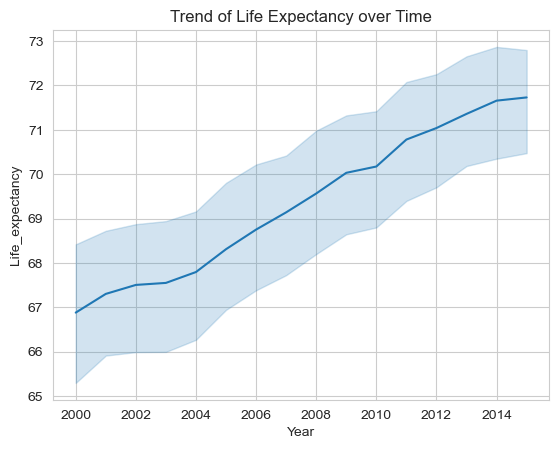

In [68]:
sns.lineplot(data=life_expectancy_df, x='Year', y='Life_expectancy')
plt.title('Trend of Life Expectancy over Time')

#### 2. How does life expectancy vary across different countries?

In [89]:
# grouping by country

life_exp = life_expectancy_df.groupby('Country')['Life_expectancy'].count().sort_values(ascending=False)

#### 3. Is there a difference in life expectancy between developed and developing countries?

In [93]:
group_status = life_expectancy_df.groupby('Status').Life_expectancy.count()
group_status

Status
Developed      496
Developing    2352
Name: Life_expectancy, dtype: int64

Text(0.5, 1.0, 'Difference in Life Expectancy between Developed vs Developing Countries')

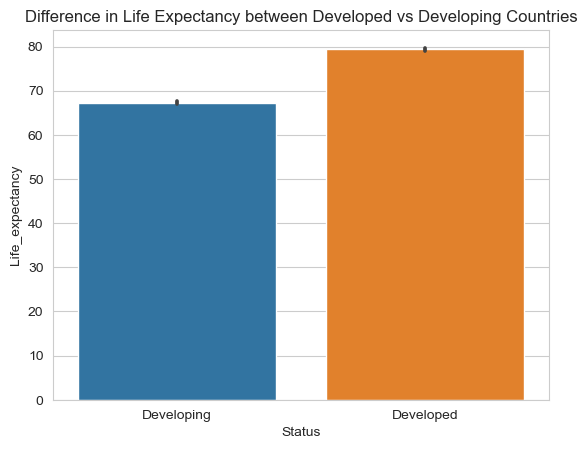

In [91]:
sns.barplot(data=life_expectancy_df, x='Status', y='Life_expectancy')
plt.title('Difference in Life Expectancy between Developed vs Developing Countries')

#### Insights:
- There is a significant different between life expctancy of the developed and developing countries
- Developed countries have higher life expectancy compared to developing countries

#### 4. How do healthcare factors such as vaccination coverage (Hepatitis B, Measles, Polio, Diphtheria) correlate with life expectancy?

In [257]:
health = life_expectancy_df[['Hepatitis_B', 'Polio', 'Diphtheria', 'Life_expectancy']]
health_corr = health.corr('pearson')
health_corr

,Hepatitis_B,Polio,Diphtheria,Life_expectancy
Hepatitis_B,1.000000,0.484224,0.610164,0.256613
Polio,0.484224,1.000000,0.672972,0.464366
Diphtheria,0.610164,0.672972,1.000000,0.476795
Life_expectancy,0.256613,0.464366,0.476795,1.000000


<AxesSubplot:>

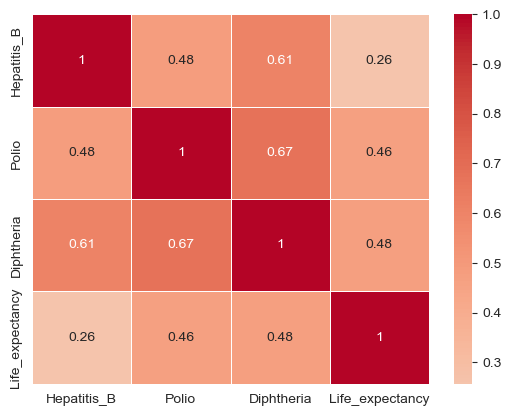

In [258]:
sns.heatmap(data=health_corr, cmap='coolwarm', annot=True, linewidth=.5, center=0)

#### Insights:
- Healthcare factors such as vacinnation coverage (Hepatitis B, Measles, Polio, Diphtheria) have positive correlation with 
    life expectancy over the period under review
- Hepatitis B have a Pearson correlation value of 0.26 which shows a positive correlation with life expectancy
- Polio also have a positive correlation with life expectancy with a Pearson correlation value of 0.46
- Diphtheria have a positive correlation with life expectancy with a Pearson correlation coefficient of 0.48
- Over all, healthcare factors have positive influence on the life expectancy

<AxesSubplot:xlabel='Diphtheria', ylabel='Life_expectancy'>

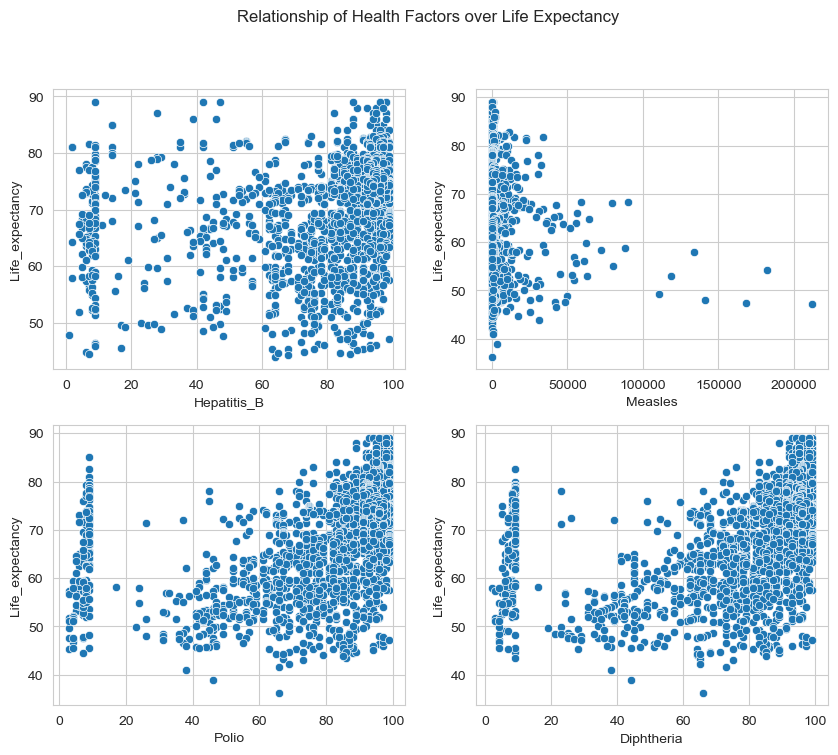

In [118]:
# healthcare impact

fig, g = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.suptitle('Relationship of Health Factors over Life Expectancy')

sns.scatterplot(data=life_expectancy_df, x= 'Hepatitis_B', y='Life_expectancy', ax = g[0, 0])
sns.scatterplot(data=life_expectancy_df, x= 'Measles', y='Life_expectancy', ax = g[0, 1])
sns.scatterplot(data=life_expectancy_df, x= 'Polio', y='Life_expectancy', ax = g[1, 0])
sns.scatterplot(data=life_expectancy_df, x= 'Diphtheria', y='Life_expectancy', ax = g[1, 1])

#### 5. How do diseases like HIV/AIDS impact life expectancy?

                 HIV/AIDS  Life_expectancy
HIV/AIDS         1.000000        -0.559105
Life_expectancy -0.559105         1.000000


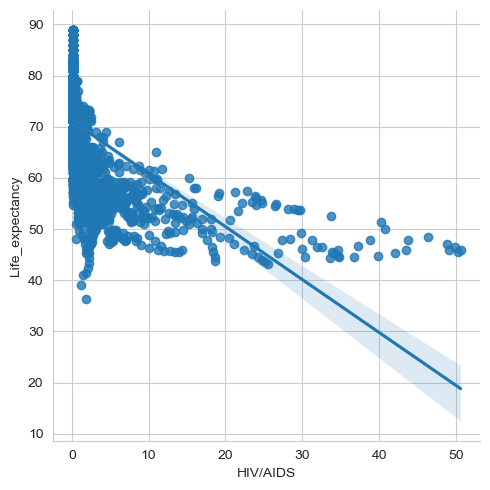

In [231]:
# disease analysis
corr_hiv = life_expectancy_df[['HIV/AIDS', 'Life_expectancy']]
corr = corr_hiv.corr('pearson')
print(corr)
sns.lmplot(data=life_expectancy_df, x='HIV/AIDS', y='Life_expectancy')

#### Insight:
- HIV/AIDS have impcated negatively on the life expectancy of individuals living with the virus
- There is a negative linear relationship bewteen HIV/AIDS and life expectancy
- For every increase in the transmission rate of HIV which could lead to AIDS and death of individuals, there is a 
    decrease in the life expectancy of such individuals infected with the virus.

#### 6. How does infant and under-five mortality affect life expectancy?

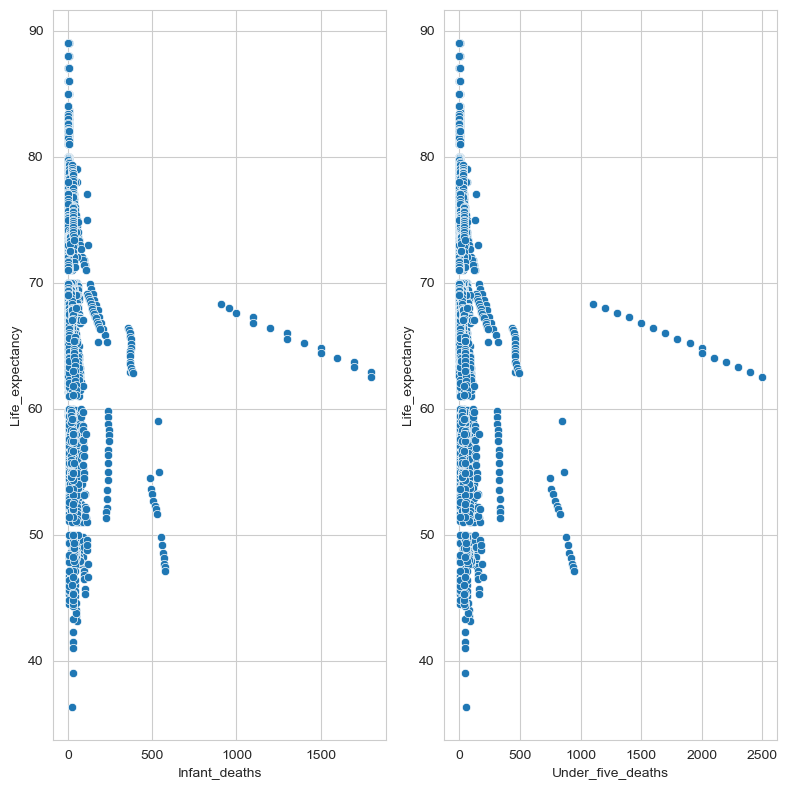

In [255]:
# infant and child mortality
fig, g = plt.subplots(1, 2, figsize=(8, 8))

sns.scatterplot(data=life_expectancy_df, x='Infant_deaths', y='Life_expectancy', ax=g[0])
sns.scatterplot(data=life_expectancy_df, x='Under_five_deaths', y='Life_expectancy', ax = g[1])
fig.tight_layout()

In [199]:
#corr 
corr_mortality = life_expectancy_df.iloc[:, [9, 10, -1]]
corr_mortality

,Infant_deaths,Under_five_deaths,Life_expectancy
0,62,83,65.0
1,64,86,59.9
2,66,89,59.9
3,69,93,59.5
4,71,97,59.2
...,...,...,...
2843,27,42,44.3
2844,26,41,44.5
2845,25,40,44.8
2846,25,39,45.3


In [200]:
corr_df = corr_mortality.corr('pearson')
corr_df

,Infant_deaths,Under_five_deaths,Life_expectancy
Infant_deaths,1.000000,0.996948,-0.201055
Under_five_deaths,0.996948,1.000000,-0.224903
Life_expectancy,-0.201055,-0.224903,1.000000


<AxesSubplot:>

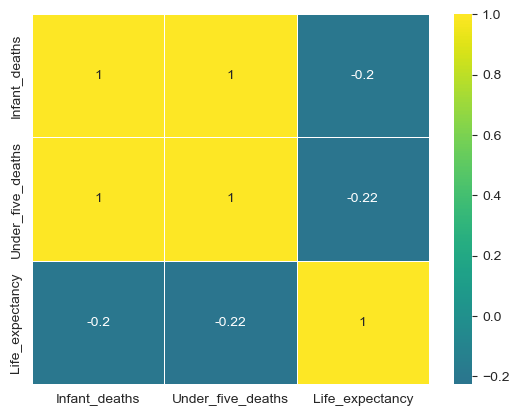

In [223]:
sns.heatmap(data=corr_df, cmap='viridis', annot = True, linewidth=.5, center=0)

#### Insights:
- Infant deaths and child mortality have negative effects on the life expectancy.
- Infant deaths have negative effects on life expectancy with a negative correlation coefficient of -0.2
- Higher infant deaths decreases life expectancy by 0.20%
- Under five deaths also affects life expectancy negatively with a negative correlation coefficient of -0.22
- Higher under five deaths also decreases life expectancy by 0.22%
- A strong or perfect correlation exist between the infant deaths and under five deaths.

#### 7. Is there a relationship between economic indicators (GDP, total expenditure) and life expectancy?

Text(0.5, 1.0, 'Scatter plot of Total Expenditure vs Life Expectancy')

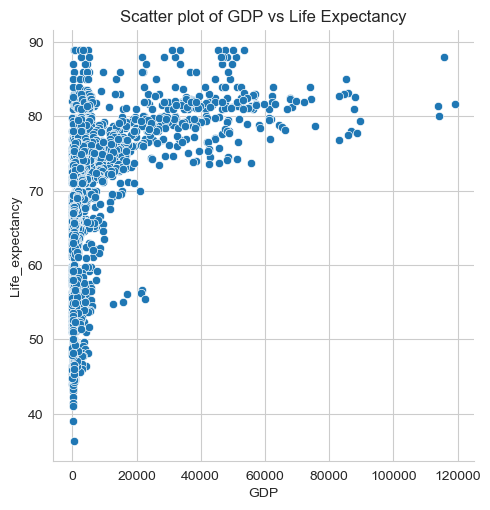

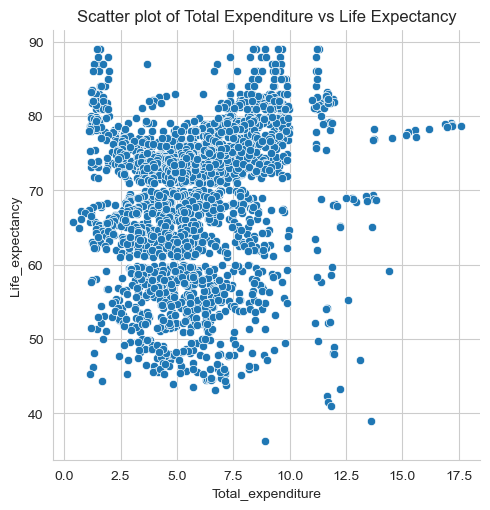

In [254]:
sns.relplot(data=life_expectancy_df, x='GDP', y='Life_expectancy')
plt.title('Scatter plot of GDP vs Life Expectancy')
sns.relplot(data=life_expectancy_df, x='Total_expenditure', y='Life_expectancy')
plt.title('Scatter plot of Total Expenditure vs Life Expectancy')

#### Insights:
- There exist a positive relationship bewteen GDP and Total expenditure and life expectancy
- GDP have almost a strong relationship with life expectancy
- Total expenditure also shows a relationship with life expectancy but not as strong as GDP

In [242]:
#economic factors

corr_econs = life_expectancy_df[['GDP', 'Total_expenditure', 'Life_expectancy']]

In [227]:
corr = corr_econs.corr('pearson')
corr

,GDP,Total_expenditure,Life_expectancy
GDP,1.000000,0.141139,0.460414
Total_expenditure,0.141139,1.000000,0.222788
Life_expectancy,0.460414,0.222788,1.000000


#### 8. How does BMI and thinness among adolescents correlate with life expectancy?

Text(0.5, 1.0, 'Linear Relationship between Thinness vs Life Expectancy')

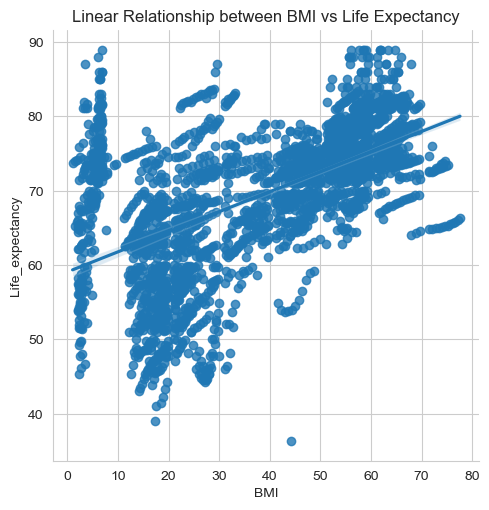

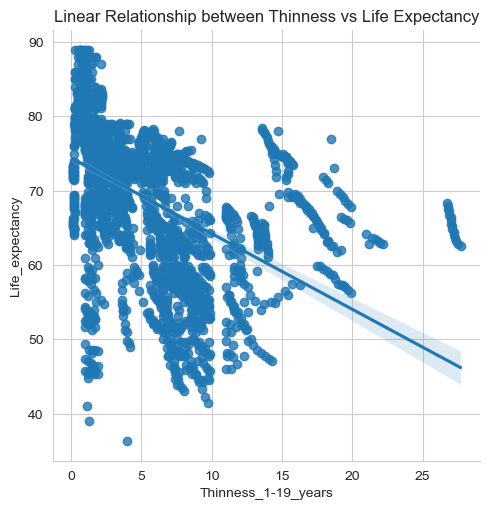

In [253]:
# nutritional factor
#fig, g = plt.subplots(1, 2, figsize=(5, 5))
sns.lmplot(data=life_expectancy_df, x='BMI', y='Life_expectancy')
plt.title('Linear Relationship between BMI vs Life Expectancy')
sns.lmplot(data=life_expectancy_df, x='Thinness_1-19_years', y='Life_expectancy')
plt.title('Linear Relationship between Thinness vs Life Expectancy')

In [260]:
bmi_th = life_expectancy_df[['BMI', 'Thinness_1-19_years', 'Life_expectancy']]
bmi = bmi_th.corr('pearson')
bmi

,BMI,Thinness_1-19_years,Life_expectancy
BMI,1.000000,-0.530313,0.567650
Thinness_1-19_years,-0.530313,1.000000,-0.477009
Life_expectancy,0.567650,-0.477009,1.000000


#### Insights:
- BMI have a strong positive linear relationship with life expectancy.

- Thinness have a negative linear relationship with life expectancy.
- Thinner adloscents are more likely to have higher life expectancy.

#### 9. Does alcohol consumption impact life expectancy?

Text(0.5, 1.0, 'Linear Relationship between Alcohol Consumption & Life Expectancy')

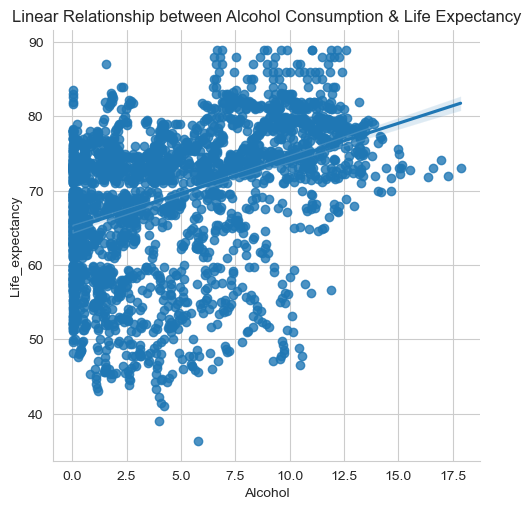

In [244]:
# alcohol consumption
sns.lmplot(data=life_expectancy_df, x='Alcohol', y='Life_expectancy')
plt.title('Linear Relationship between Alcohol Consumption & Life Expectancy')

#### Insights:
- Alcohol consumption affects life expectancy.
- 

#### 10. How does education (schooling) influence life expectancy?

Text(0.5, 1.0, 'Linear Relationship between Education vs Life Expectancy')

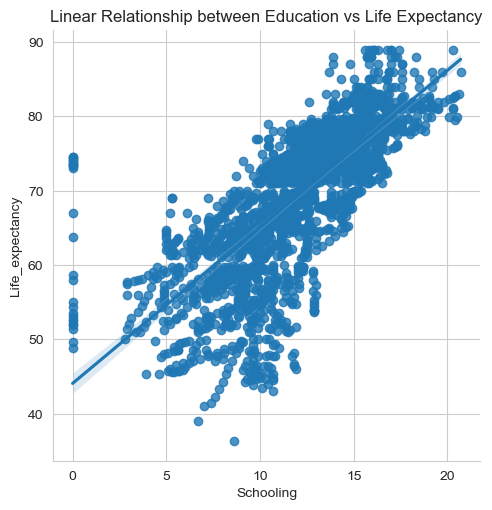

In [243]:
# education impact
sns.lmplot(data=life_expectancy_df, x='Schooling', y='Life_expectancy')
plt.title('Linear Relationship between Education vs Life Expectancy')

#### Insights:
- Education have positive influence on life expectancy overall.
- The more educated or enlightened individuals across diferent countries are, the higher their chances of prolonged 
    life expectancy 